# Neuronal Modelling

The amount that the membrane potential changes (in a small amount of time) is equal to the current flowing, divided by the capacitance of the cell multiplied by that small amount of time. And THAT is basically what all neuronal models perform: for each compartment of the cell, it calculates what it is, then performs that computation.

---

## Membrane Equation
### <span style='color:Red'> ΔV= C / I​ ⋅Δt  </span>

Where:

Δ
𝑉
 = change in membrane potential (voltage)

𝐼
 = current flowing into the compartment

𝐶
 = capacitance of the membrane

Δ
𝑡
 = small time increment



---

## Using Ohm's Law: I = G * V
### <span style='color:Red'> Ix = Gx * (Vm - Ex) </span>

Where:

Ix = current through ion channel X

Gx = conductance of the channel (how open it is)

Vm = membrane potential

Ex = reverse potential for the ion (the voltage that balances out that ion's concentration gradient)

This current is:

- <span style='color:Blue'> Positive if current flows out of the cell  </span>
- <span style='color:Blue'> Negative if current flows into cell  </span>

The current that changes the membrane voltage is the current flowing into or out of the capacitor, not the ion channel.

<span style='color:Green'> Capacitor current is opposite </span>

- The neuron’s membrane is modeled as a capacitor.
##### - Capacitor current = − Ion channel current


<ipython-input-6-3daa52998f06>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_out[t] = v_out[t-1] + dv;     #add dv on to our last known voltage


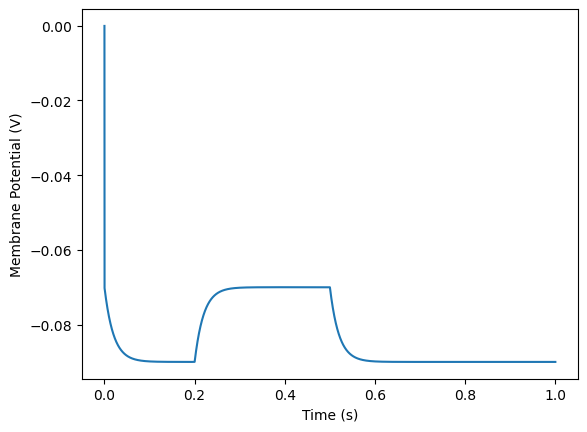

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
 
# Basic simulation Properties
dt     = 10E-6;     # 10 us timestep
 
# Basic Cell Properties
Cm     = 100E-12;   # Membrane Capacitance = 100 pF
v_init = -70E-3;    # Initial membrane potential -70 mV
Gk     = 5E-9       # 5 nS conductance
Ek     = -90E-3     # Reversal potential of -90 mV
 
# Injected Current step
current_magnitude = 100E-12; # 100 pA
 
#Injected current, 0.2 seconds of 0 current, 0.3 seconds of some current,
#and 0.5 seconds of no current
i_inj = np.concatenate( (np.zeros([round(0.2/dt),1]),
                         current_magnitude*np.ones([round(0.3/dt), 1]),
                         np.zeros([round(0.5/dt), 1])) )
 
#Preallocate the voltage output
v_out = np.zeros(np.size(i_inj))
 
#Time loop
for t in range(np.size(v_out)):
    if t == 1:
        v_out[t] = v_init; #At the first time step, set voltage to the initial condition
    else:
        i_ion = Gk * (v_out[t-1] - Ek)  #Calculate the current through ion channels
        i_cap = i_inj[t] - i_ion;       #Calculate what i is
        dv = i_cap/Cm * dt;     #Calculate dv
        v_out[t] = v_out[t-1] + dv;     #add dv on to our last known voltage
 
#Make the graph
t_vec = np.linspace(0, 1, np.size(v_out))
plt.plot(t_vec, v_out)
plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (V)')
plt.show()


## The Hodgkin Huxley Model

The Hodgkin-Huxley model simulates the dynamics of ion channels (proteins that allow ions to flow across the cell membrane). It predicts how the membrane potential (voltage across the cell membrane) changes over time, based on the movement of ions like sodium (Na+) and potassium (K+). By modeling the opening and closing of these ion channels, the equations can accurately reproduce the shape and timing of action potentials. 


### Ik = gk * n^4 (V - Ek)

**Where:**

- gk = maximum potassium conductance (when all channels are open)  
- n^4 = proportion of fully open potassium channels  
- V = membrane voltage  
- Ek = reversal potential for potassium  

---

**So:**

- If more gates are open → \( n^4 \) increases → **more current**
- If \( V \) is far from \( E_K \) → **larger driving force** → **more current flows**

<ipython-input-8-f3cfe2328001>:95: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_out[t] = v_out[t-1] + dv


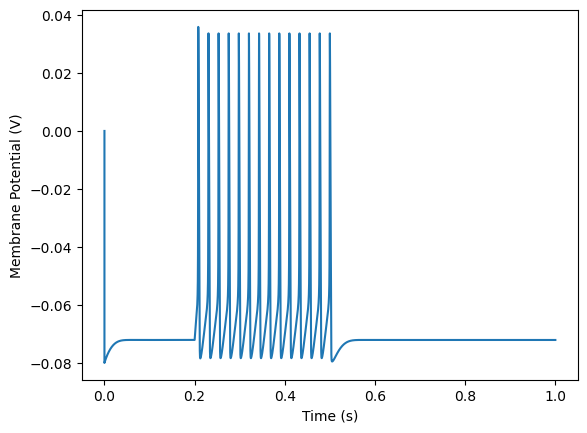

In [ ]:
#Functions to calculate the alpha and beta rates
def alpha_n(v):
    v = v*1000
    return 0.01 * (-v-55)/( math.exp((-v-55)/10.0) -1) * 1000
 
def beta_n(v):
    v = v*1000
    return 0.125*math.exp((-v-65)/80.0) * 1000
 
def alpha_m(v):
    v = v*1000
    return 0.1 * (-v-40)/( math.exp((-v-40)/10.0) -1) * 1000
 
def beta_m(v):
    v = v*1000
    return 4*math.exp((-v-65)/18.0) * 1000
 
def alpha_h(v):
    v = v*1000
    return 0.07*math.exp((-v-65)/20.0) * 1000
 
def beta_h(v):
    v = v*1000
    return 1/( math.exp((-v-35)/10.0) +1) * 1000
 
 
# Basic simulation Properties
dt     = 10E-6;     # 10 us timestep
 
# Basic Cell Properties
Cm     = 100E-12;   # Membrane Capacitance = 100 pF
v_init = -80E-3;    # Initial membrane potential -80 mV
 
##HH Potassium Properties
# Initial condition for particles
n      = alpha_n(v_init)/(alpha_n(v_init)+beta_n(v_init))          
m      = alpha_m(v_init)/(alpha_m(v_init)+beta_m(v_init))
h      = alpha_h(v_init)/(alpha_h(v_init)+beta_h(v_init))
 
Gbar_k = 1E-6      # Maximum potassium conductance
Gbar_na= 7E-6      # Maximum sodium conductance
Gleak  = 5E-9      # 5 nS conductance
 
Ek     = -80E-3    # Reversal for HH potassium current
Ena    = 40E-3     # Reversal for HH sodium current
Eleak  = -70E-3    # Reversal potential of -60 mV
 
# Injected Current step
current_magnitude = 200E-12; # 200 pA
 
#Injected current, 0.2 seconds of 0 current, 0.3 seconds of some current,
#and 0.5 seconds of no current
i_inj = np.concatenate( (np.zeros([round(0.2/dt),1]),
                         current_magnitude*np.ones([round(0.3/dt), 1]),
                         np.zeros([round(0.5/dt), 1])) )
 
#Preallocate the voltage output
v_out = np.zeros(np.size(i_inj))
 
 
#Time loop
for t in range(np.size(v_out)):
    if t == 1:
        v_out[t] = v_init; #At the first time step, set voltage to the initial condition
    else:
        #Calculate how the particles change
        dn = (alpha_n(v_out[t-1]) * (1 - n) - beta_n(v_out[t-1]) * n) * dt
        n = n + dn
 
        dm = (alpha_m(v_out[t-1]) * (1 - m) - beta_m(v_out[t-1]) * m) * dt
        m = m + dm
    
        dh = (alpha_h(v_out[t-1]) * (1 - h) - beta_h(v_out[t-1]) * h) * dt
        h = h + dh
        
        #Calculate the potassium channel conductance
        Gk = Gbar_k*n*n*n*n;
        #Calculate what the current through the potassium channel is
        i_k = Gk * (v_out[t-1] - Ek)
 
        #Calculate the sodium channel conductance      
        Gna = Gbar_na*m*m*m*h
        #Calculate what the current through the sodium channel is
        i_na = Gna * (v_out[t-1] - Ena)
 
        #Calculate the current through ion channels
        i_leak = Gleak * (v_out[t-1] - Eleak)  
 
        #Sum all the currents
        i_cap = i_inj[t] - i_leak - i_k - i_na
 
        #Calculate dv, using our favourite equation
        dv = (i_cap/Cm) * dt
        #add dv on to our last known voltage
        v_out[t] = v_out[t-1] + dv      
 
 
 
#Make the graph
t_vec = np.linspace(0, dt*np.size(v_out), np.size(v_out))
plt.plot(t_vec, v_out)
plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (V)')
plt.show()